# Introduction to Deep Learning: Single Neuron

## WH questions about DL



*   **What is a Neural Network? How does it works?** As the name suggest, Machine Learning is somehow inspired by the human brain. Specifically, Neural Networks are almost trying to imitate how our brain computes all the information it receives through our senses. One must take into account that brains are complex, non-linear, parallel computers (2009, Haykin, S.) As neurons receive information pulses are sent to other neurons through synapses if and only if that information is relevant. The beforehand mentioned attributes of the human brain are those whom allow us not only to compute faster than digital computers, but to adapt to different environments not losing the capability of abstraction for decision making situations. If you are interested in the details of the discussion about the brain-copmuter "imitation game" go to Haykin's text, pages 1 - 10.

  More technically speaking, a Neural Network is a **function** that takes the input signals, evaluates if they are relevant to each neuron, and send that signal to another neuron (just like the synaptic process of neurons!). Such function is described as

  \begin{align*}
    y = f_{NN} (\textbf{x}) = \textbf{f}_3 (\textbf{f}_2 (\textbf{f}_1 ( \textbf{x}) ) )
  \end{align*}

  Where $\textbf{f}_i$ is a function of the following form

  \begin{align*}
    \textbf{f}_i (\textbf{z}) = \textbf{g}_i (\textbf{W}_i \textbf{z} + \textbf{b}_i)
  \end{align*}

  where $\textbf{g}_i$ is an activitation function associated with each neuron. Recall that an activitation function is just the way neurons define whether ot not a determined input is relevant for them; it is a fixed nonlinear function chosen before learning. Every $\textbf{W}_i$ represents the weights of synaptic process (think of them as the relevance of each input). It is important to note that $\textbf{W}_i$ is a matrix in which every row represent a vector that, computed with the $l-th$ row of $\textbf{W}_i$, gives the vector of the activited function of each individual input. It might be easier to comprehend this if one looks at it as in the following formulation

  \begin{align*}
    u_k = \sum_{j = 1}^{m} w_{k ~ j}x_j
  \end{align*}

  and

  \begin{align*}
    y_k = \psi(u_k + b_k)
  \end{align*}  

  Where $u_k$ represent the linear combination of each input and it's respective weight, and $y_k$ represents output signal of the neuron. Note that this output is given by the activation function of the "input" (it is actually the $u_k$ term) and some $b_k$ which we shall call *bias* (think of it as just some kind of error that the neuron has). If one think $u_k + b_k$ as some $v_k$ this term becomes some sort of *threshold* which acts as the criteria for activating the activitation function. Therefore, the previous formulation can be stated as

  \begin{align*}
    y_k = \psi(u_k + b_k) = \psi(v_k)
  \end{align*}

  Observe that one can express the threshold combining the previous equations as
    
  \begin{align*}
    v_k = \sum_{j = 0}^{m} w_{k ~ j}x_j
  \end{align*}

  Which lead us to understand such threshold as

  \begin{align*}
    v_k = \sum_{j = 1}^{m} w_{k ~ j}x_j + b_k
  \end{align*}

  with $x_0 = 1$ and $w_{k0} = b_k$. For a more detailed derivation read Haykin's book pages 10 - 15.

  Graphically, the first and second formulation will look, respectively, like



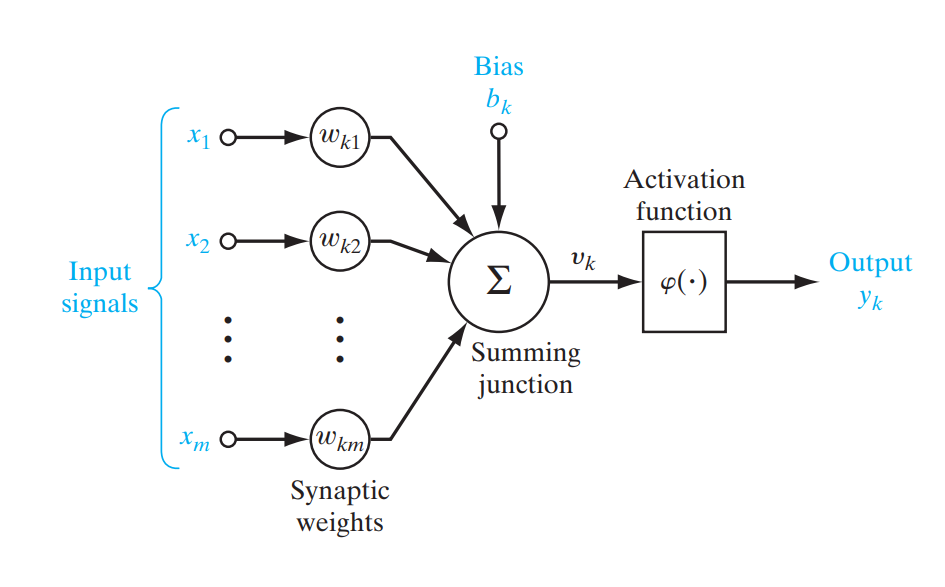

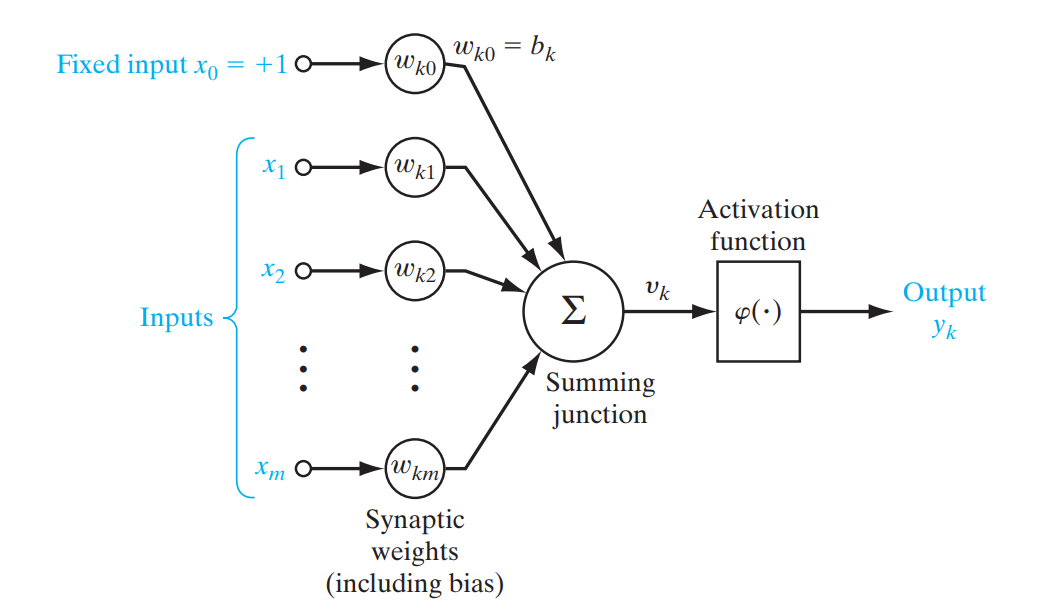

Both images were taken from (2009, Haykin, S.)

## Perceptron and its importance



*   **Perceptron:**

  First introduced in 1958 by Rossenblatt, is the first model of supervised learining. Works as a linear classifier i.e. given a set of inputs it assigns them a binary value (sometimes it can be +1 or -1, sometimes it is 0 or 1). The fact that it is *linear* means that it can only work if the data is linearly separable (A discussion on linearly separable data is out of the scope of this notebook, an interested reader can look at reference number 3.). Actually, a perceptron is just a neural network with a single neuron. The details on how it works are well described in previous sections. Althought, a few more considerations on the perceptron can be given.

  As its pourpose is to classify, one can simplify the previous notation and formulate the perceptron as

  \begin{align*}
    f_{NN} (\textbf{x}) = \textbf{f}_1 (\textbf{x}) = sign(\textbf{w}^{T} \textbf{x})
  \end{align*}

  Where $\textbf{w}$ is the vector containing the weights of each input, stored in $\textbf{x}$. In addition, given that the Perceptron is a linear classifier its goal is to classify (separate) data into two groups. This separation is done by a *hyperplane* (take into account that data will not always be 2 dimensional) which will have the following formulation for a $n$-dimensional space

  \begin{align*}
    \sum_{i = 1}^{n} w_i x_i + b = 0
  \end{align*}

  Note that $w_i$ is the weight of $x_i$, and $b$ the bias.
   
*   **How does it learn?**
  First of all, take a look at the following data set


network of neurons = multilayer perceptron

lorem ipsum

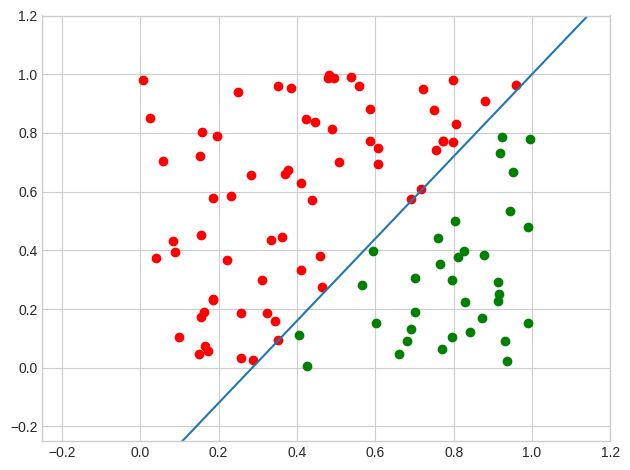

In [21]:
#This code is trying to generate a linearly separable data set

import matplotlib.pyplot as plt
import numpy as np

X = np.random.rand(100, 2)

# We will be creating a data set separable by the line 5y = 7x - 2

for i in range(len(X)):
  if (7*X[i, 0]-2) < 5*X[i, 1]: # Here we're colouring the upper side of the line
    plt.scatter(X[i, 0], X[i, 1], c = 'r')

  else: # Here we're colouring the lower side of the line
    plt.scatter(X[i, 0], X[i, 1], c = 'g')

# Creating the vector that contains all the x-coordinate points of the line
x = np.linspace(-2, 2, 100)
y = (7*x - 2) / 5 # Creating the line using the x-coordinate vector

plt.plot(x, y)

plt.xlim(-0.25, 1.2)
plt.ylim(-0.25, 1.2)

plt.show()

Evidently, this dataset is linearly separable (i. e. one can separate it, with a hyperplane). The key idea of this algorithm is to determine the optimal weights and biases in order to correctly split the data set.

The Perceptron Learning Algorithm (PLA) works like this: If we assume that the data is linearly separable, then it is guaranteed that there is a vector $\textbf{w}$ containing all the weights that allow $f_{NN}$ to make the right decision. In order to find the values of such vector, the algorithm starts with a particular $\textbf{w}$. Then, the algorithm picks an example from the dataset that is currently misclassified, and then uses it to update $\textbf{w}$. Since this process is iterative, the update rule will be

\begin{align*}
  \textbf{w}(t + 1) = \textbf{w}(t) + y(t)x(t)
\end{align*}

Where $(\textbf{x}(t), y(t))$ is the misclassified example. Note that the misclassified example is taken randomly, and that the result holds for any initial $\textbf{w}$. Basicaly, what the iterations are doing is moving the hyperplane (boundary) for an optimal separation. More formally, a missclassification in a PLA implies that $y(t) \neq sign( \textbf{w}^{T}(t) \textbf{x}(t) )$, and that $y(t)$ is the vector of all the $h(x_i)$, it is easy to see that $y(t)\textbf{w}^{T}(t) \textbf{x}(t) < 0$ since they both have different signs. Using the update rule we have that

\begin{align*}
  y(t)\textbf{w}^{T}(t + 1) \textbf{x}(t) = y(t) (\textbf{w}(t) + y(t)\textbf{x}(t))^{T} \textbf{x}(t)
\end{align*}

Then,

\begin{align*}
  y(t) (\textbf{w}(t) + y(t)\textbf{x}(t))^{T} \textbf{x}(t) &= y(t) (\textbf{w}^{T}(t) + y(t) \textbf{x}^{T}(t)) \textbf{x}(t) \\
  &= y(t) \textbf{w}^{T}(t) \textbf{x}(t) + y(t) y(t) \textbf{x}^{T}(t) \textbf{x}(t)
\end{align*}

Since $y(t) y(t) \textbf{x}^{T}(t) \textbf{x}(t) > 0$ we get

\begin{align*}
  y(t) (\textbf{w}(t) + y(t)\textbf{x}(t))^{T} \textbf{x}(t) &= y(t) (\textbf{w}^{T}(t) + y(t) \textbf{x}^{T}(t)) \textbf{x}(t) \\
  &= y(t) \textbf{w}^{T}(t) \textbf{x}(t) + y(t) y(t) \textbf{x}^{T}(t) \textbf{x}(t) \\
  &> y(t) \textbf{w}^{T}(t) \textbf{x}(t)
\end{align*}

That is

\begin{align*}
  y(t) \textbf{w}^{T}(t + 1) \textbf{x}(t) > y(t) \textbf{w}^{T}(t) \textbf{x}(t)
\end{align*}

Hence, as exposed before, each step the target gets 'more positive'. Since every time that $y(t)$ and $w^{T}(t) x(t)$ have different signs, $\textbf{w}^{T}(t) x(t)$ moves further into its region. Therefore, when moving from $\textbf{w}(t)$ to $\textbf{w}(t + 1)$ we are doing it 'in the right direction' because each steps push the value to its correct region.

## The maths behind it

Here are some basic results of the PLA

**PLA Convergence Theorem:** Assume that there exist some parameter vector $\theta^*$ such that $\| \theta^* \| = 1$, and some $\gamma > 0$ such that for all $t = 1, \cdots, n$,

\begin{align*}
  y_t(x_t \cdot \theta^*) \geq \gamma
\end{align*}

Assume in addition that for all $t = 1, \cdots, n$, $\| x_t \| \leq R$. Then, the PLA makes at most

\begin{align*}
  \frac{R^2}{\gamma^2}
\end{align*}

errors. Where $\| \cdot \|$ is the Euclidean norm.

For a proof look [here](https://www.cs.cmu.edu/~avrim/ML10/lect0125.pdf)

**Theorem:** Let $\mathbf{S}$ be a sequence of labeled examples consistent with a linear threshold function $\textbf{w}^* \cdot \textbf{x} > 0$, where $\textbf{w}^*$ is a unit length vector. Then, the number of mistakes $M$ on $\mathbf{S}$ made by the PLA is at most

\begin{align*}
  \frac{1}{\gamma^2}
\end{align*}

where

\begin{align*}
  \gamma = \min_{\textbf{x} \in \mathbf{S}}  \frac{| \textbf{w}^* \cdot \textbf{x}|}{\| \textbf{x} \|}
\end{align*}

For more information, and a proof, look [here](https://www.cs.cmu.edu/~avrim/ML10/lect0125.pdf)

## Some implementations

The following code let us "see" the backstage of the Perceptron.

In [22]:
# Importing data

import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df =df.rename({0:'Large Sepal', 1:'Width Setal', 2:'Large Petal', 3:'Width Petal',4:'Class'}, axis='columns')

In [24]:
# Get some info from the dataset
def column_report(df_x):

    a = pd.DataFrame(df_x.dtypes, columns = ['dtypes']) # Info about the data type

    b = pd.DataFrame(df_x.isna().sum(), columns = ['nulls']) # Info about null values

    b['%nulls'] = round(100 * b['nulls'] / df_x.shape[0], 2) # Column with % of null values

    c = df_x.describe(include='all').transpose()

    return a.join(b).join(c).sort_values('dtypes')

column_report(df)

,dtypes,nulls,%nulls,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Large Sepal,float64,0,0.0,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
Width Setal,float64,0,0.0,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
Large Petal,float64,0,0.0,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
Width Petal,float64,0,0.0,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Class,object,0,0.0,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


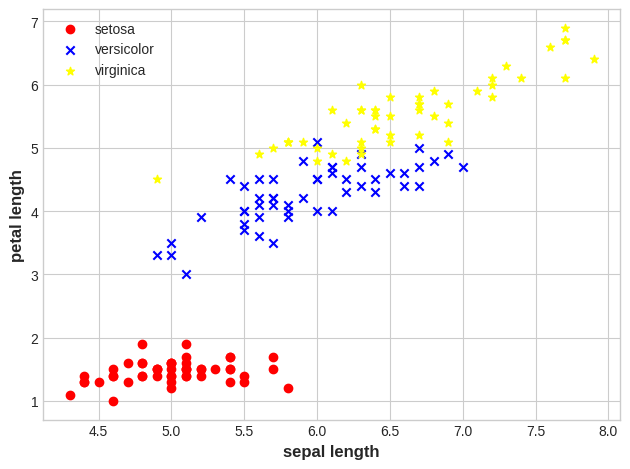

In [25]:
import matplotlib.pyplot as plt
import numpy as np

X = df.iloc[0:150, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X[100:150, 0], X[100:150, 1], color='yellow', marker='*', label='virginica')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [26]:
# Choosing between linearly and nonlinearly separable data

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

In [27]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier.
        Parameters
        ------------
        eta : float
          Learning rate (between 0.0 and 1.0)
        n_iter : int
          Passes over the training dataset.
        Attributes
        -----------
        w_ : 1d-array
          Weights after fitting.
        errors_ : list
          Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
      self.eta = eta
      self.n_iter = n_iter
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
            is the number of samples andn_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
          errors = 0
          for xi, target in zip(X, y):
            update = self.eta * (target - self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
            errors += int(update != 0.0)
          self.errors_.append(errors)
        return self

    def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.net_input(X) >= 0.0, 1, -1)

In [28]:
# Create the Perceptron
ppn = Perceptron()

# Train the Perceptron
ppn.fit(X,y)

# Predict Values
ppn.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

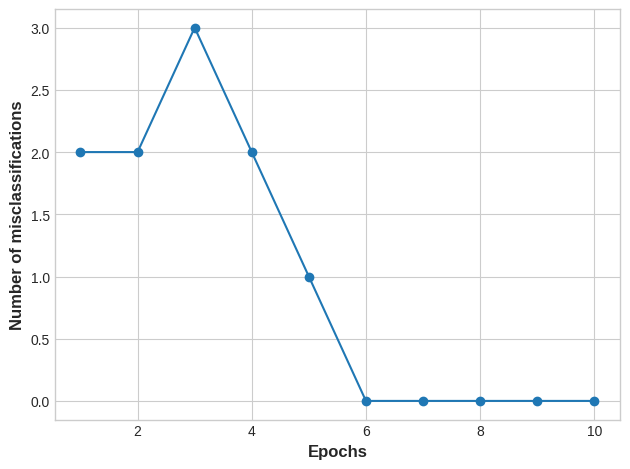

In [29]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [30]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

# Training Data (AND gate)
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 0, 0, 1])

# Create a Perceptron
perceptron = Perceptron(max_iter=100, eta0=0.1)

# Train the model
perceptron.fit(X_train, y_train)

# Datos de prueba
X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Predict
y_pred = perceptron.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_train, y_pred)

# Print results
print("Final weights:", perceptron.coef_)
print("Final bias:", perceptron.intercept_)
print("Accuracy:", accuracy)

Final weights: [[0.2 0.1]]
Final bias: [-0.2]
Accuracy: 1.0


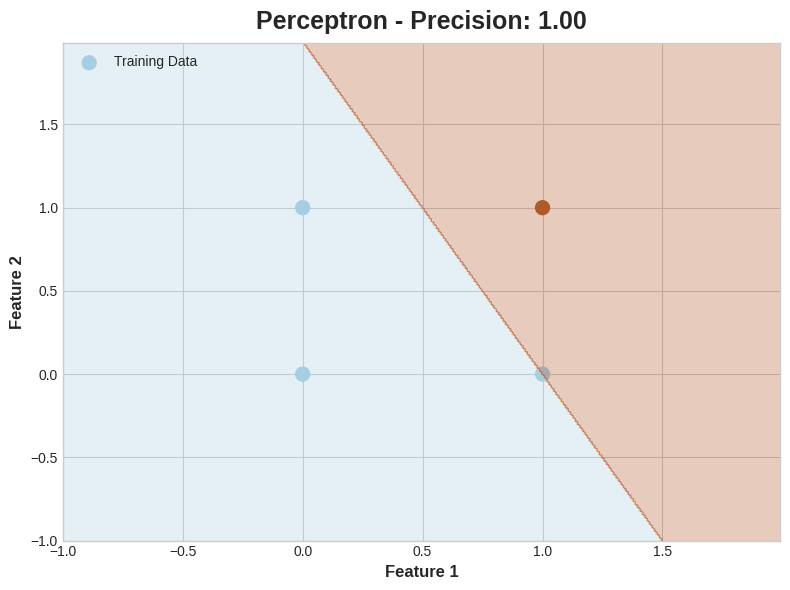

In [31]:
# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', s=100, label='Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Graph the boundary
w = perceptron.coef_[0]
b = perceptron.intercept_
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title(f'Perceptron - Precision: {accuracy:.2f}')
plt.legend(loc='upper left')
plt.show()

### Perceptron via TensorFlow: Linear Model

Here we implement a Perceptron as a single layer - single neuron Neural Network

In [32]:
import pandas as pd

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

<ipython-input-32-df86cb84368b>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [33]:
# Upload data from Drive

from google.colab import drive
drive.mount('/content/drive')
path_files = '/content/drive/MyDrive/'
red_wine = pd.read_csv(path_files + 'red-wine.csv')
red_wine.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
red_wine.shape

(1599, 12)

In [35]:
input_shape = [11]

In [36]:
# Network with 1 linear unit

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units = 1, input_shape = [11])
])

In [37]:
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.7022708 ],
       [-0.6038101 ],
       [ 0.5192185 ],
       [ 0.05221438],
       [ 0.3088575 ],
       [-0.6723717 ],
       [-0.32311696],
       [ 0.6564036 ],
       [-0.090886  ],
       [-0.6140728 ],
       [-0.5076562 ]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


4/4 [==============================] - 0s 5ms/step


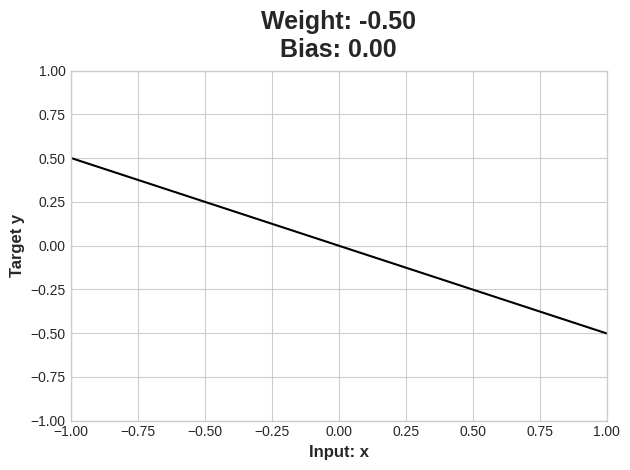

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

# References



1.   Haykin, S. (2009). Neural networks and learning machines (3rd ed.). Prentice Hall.
2.   Burkov, A. (2019). The hundred-page machine learning book. Andriy Burkov.
3.   Ben-Israel, Adi & And, Israel & Levin, Yuri. (2006). The geometry of linear separability in data sets. Linear Algebra and its Applications. 416. 75-87. 10.1016/j.laa.2005.08.014.  
4.   Abu-Mostafa, Y., Lin, H.-T., &amp; Magdon-Ismail, M. (2012). Learning from data: A short course. AMLbook.
5.   Gallant, Steve. (1990). Perceptron-based learning algorithms. IEEE transactions on neural networks / a publication of the IEEE Neural Networks Council. 1. 179-91. 10.1109/72.80230.
6.   Neil Z. (2020). Learning-From-Data-A-Short-Course. Source: https://github.com/niuers/Learning-From-Data-A-Short-Course/blob/master/Solutions%20to%20Chapter%201%20The%20Learning%20Problem.ipynb

